In [3]:
import pandas as pd
df = pd.read_csv("C:/guvi_project/Diamond_Dynamics/Diamond_prediction/diamonds_raw_dataset.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(146)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
for col in df.columns:
    print(f"{col}:\n Unique values:",df[col].nunique())

carat:
 Unique values: 273
cut:
 Unique values: 5
color:
 Unique values: 7
clarity:
 Unique values: 8
depth:
 Unique values: 184
table:
 Unique values: 127
price:
 Unique values: 11602
x:
 Unique values: 554
y:
 Unique values: 552
z:
 Unique values: 375


In [13]:
#unique values
df['cut'].unique()



array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [14]:
df['color'].unique()


array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [16]:
#checking outliers
import seaborn as sns
import matplotlib.pyplot as plt

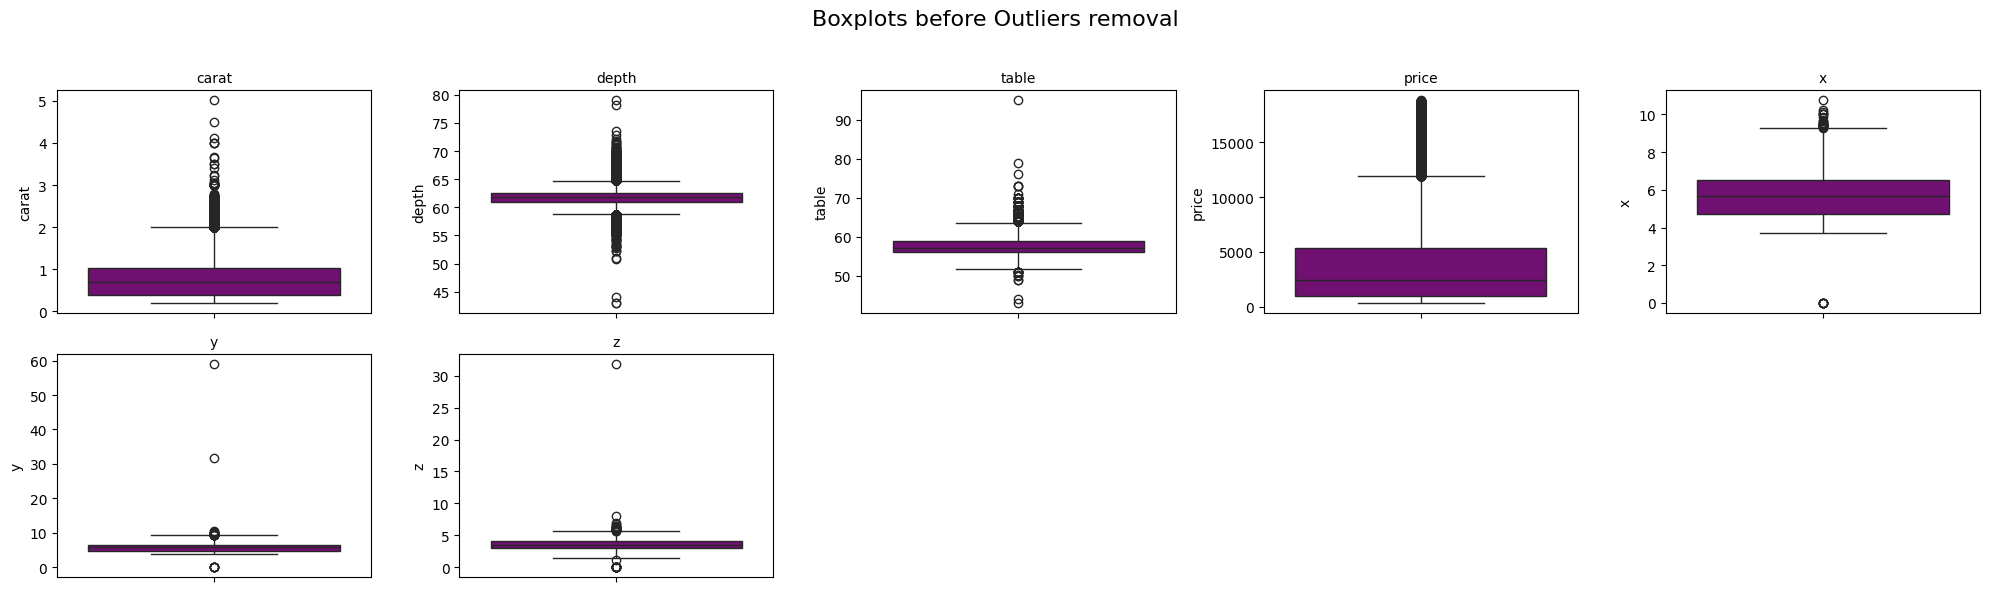

In [17]:
#before handling skewness
numerical_columns = ['carat','depth','table','price','x','y','z']
# Loop through numerical columns and create boxplots

cols_per_row = 5
rows = (len(numerical_columns) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, rows * 3))
plt.suptitle("Boxplots before Outliers removal", fontsize=16)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='purple')
    plt.title(col, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

In [18]:
#IQR for supressing outlayers
import numpy as np

for col in numerical_columns:

    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

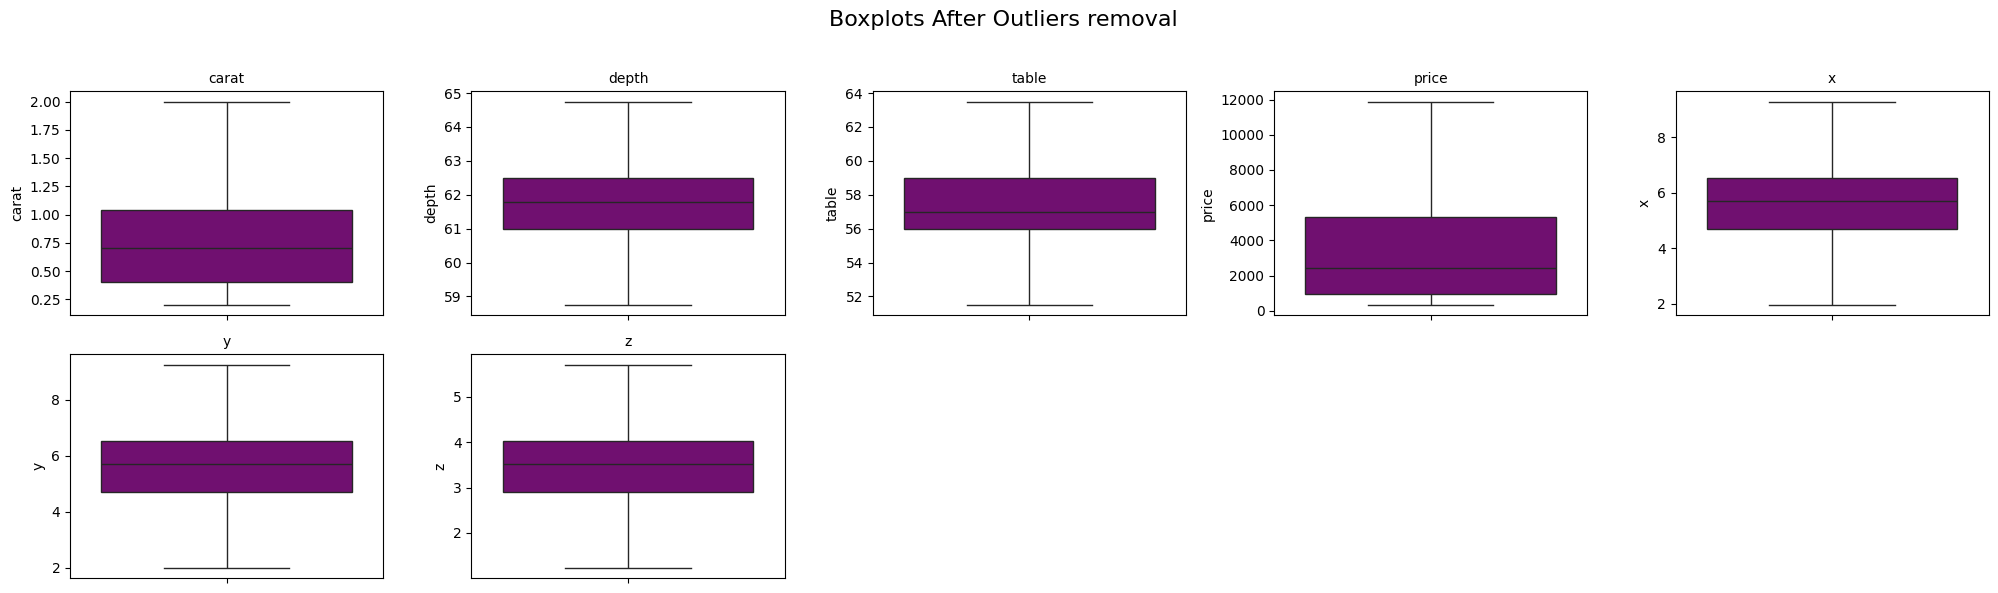

In [19]:
#After handling outlayers
numerical_columns = ['carat','depth','table','price','x','y','z']
# Loop through numerical columns and create boxplots

cols_per_row = 5
rows = (len(numerical_columns) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, rows * 3))
plt.suptitle("Boxplots After Outliers removal", fontsize=16)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='purple')
    plt.title(col, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

In [20]:
negative_columns = ['carat','depth','table','price','x','y','z']

#finding neagative values in dataset
mask = (df[negative_columns]<0).sum()
print(mask)

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64


In [21]:
negative_columns = ['carat','depth','table','price','x','y','z']
#checking skewness
skewness = df[negative_columns].skew()
print(skewness)

carat    0.899170
depth   -0.228563
table    0.472532
price    1.148606
x        0.388185
y        0.384552
z        0.372849
dtype: float64


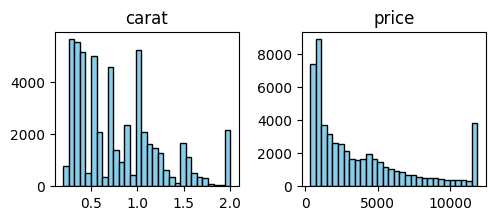

In [22]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(10, 4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 4, i)  # Adjust grid size as needed
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

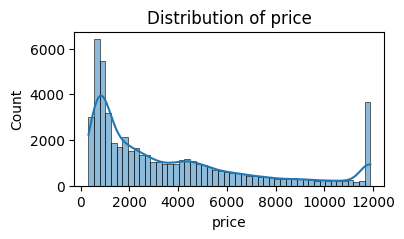

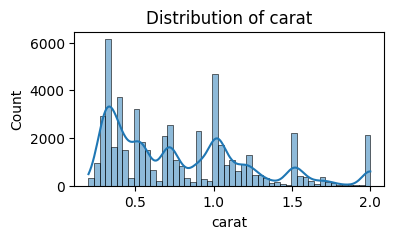

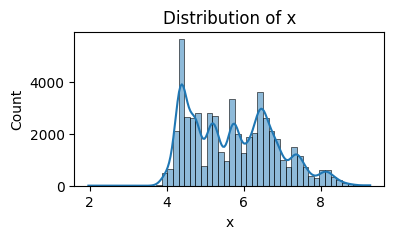

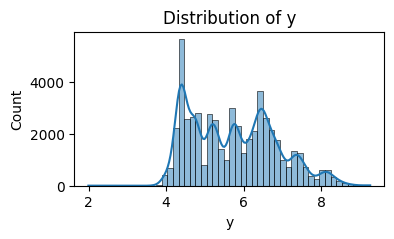

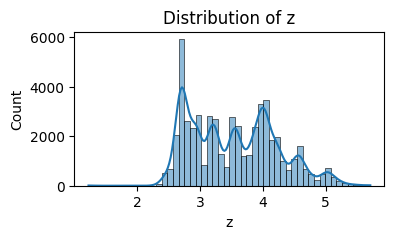

In [23]:
#EDA process
#Distribution plots for numerical features (price, carat, x, y, z)
num_features = ["price", "carat", "x", "y", "z"]

for feature in num_features:
    plt.figure(figsize=(4,2))
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f"Distribution of {feature}")
    plt.show()

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1053289852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


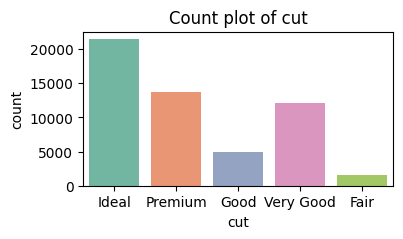

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1053289852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


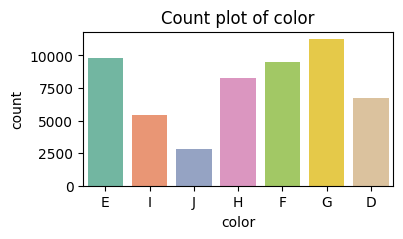

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1053289852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="Set2")


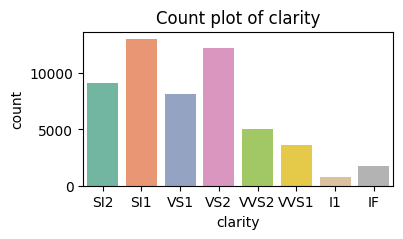

In [24]:
#Count plots for categorical features (cut, color, clarity)
categorical_features = ["cut", "color", "clarity"]

for feature in categorical_features:
    plt.figure(figsize=(4,2))
    sns.countplot(x=feature, data=df, palette="Set2")
    plt.title(f"Count plot of {feature}")
    plt.show()

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1664594093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cut", y="price", data=df, palette="Set3")


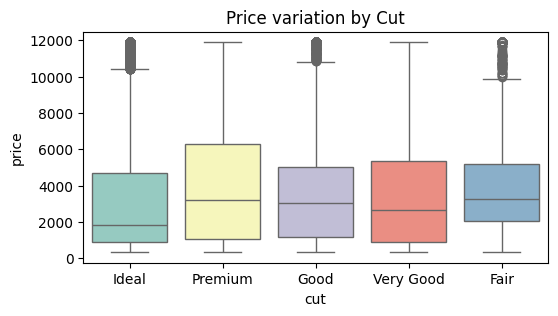

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1664594093.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="color", y="price", data=df, palette="Set3")


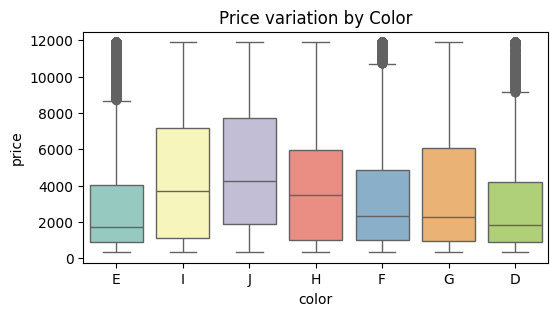

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1664594093.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="clarity", y="price", data=df, palette="Set3")


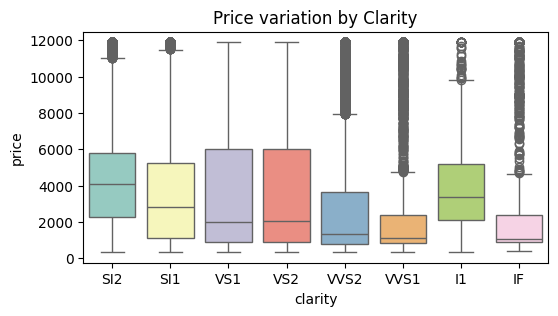

In [25]:
#Price variation with carat, cut, color, clarity using boxplots
# Price vs Carat
plt.figure(figsize=(6,3))
sns.boxplot(x="cut", y="price", data=df, palette="Set3")
plt.title("Price variation by Cut")
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x="color", y="price", data=df, palette="Set3")
plt.title("Price variation by Color")
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x="clarity", y="price", data=df, palette="Set3")
plt.title("Price variation by Clarity")
plt.show()

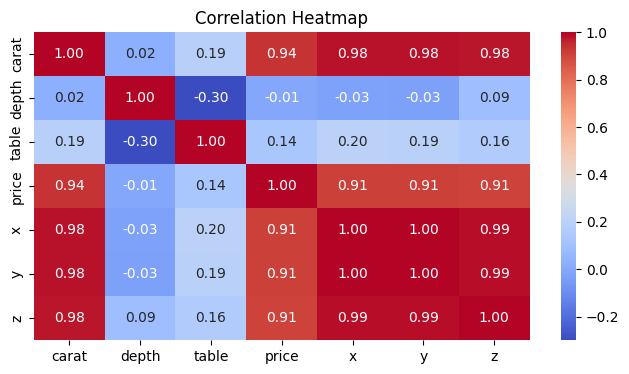

In [26]:
#Correlation heatmap for numerical features
plt.figure(figsize=(8,4))
corr = df[['carat','depth','table','price','x','y','z']].corr()   
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
#dropping table,depth column as not highly correlated
df.drop(['table', 'depth'], axis=1, inplace=True)

In [28]:
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757.0,6.15,6.12,3.74


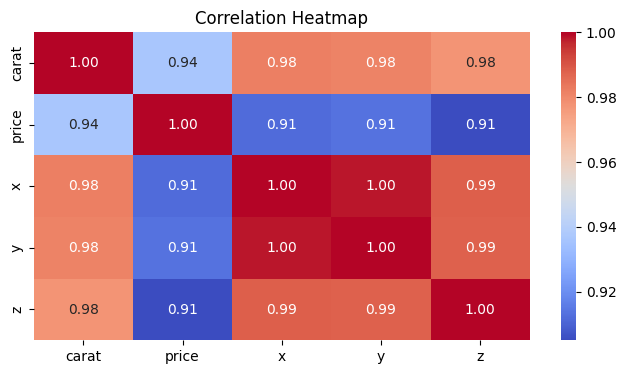

In [29]:
#Correlation heatmap for numerical features
plt.figure(figsize=(8,4))
corr = df[['carat','price','x','y','z']].corr()   
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
#feature selected using correlation

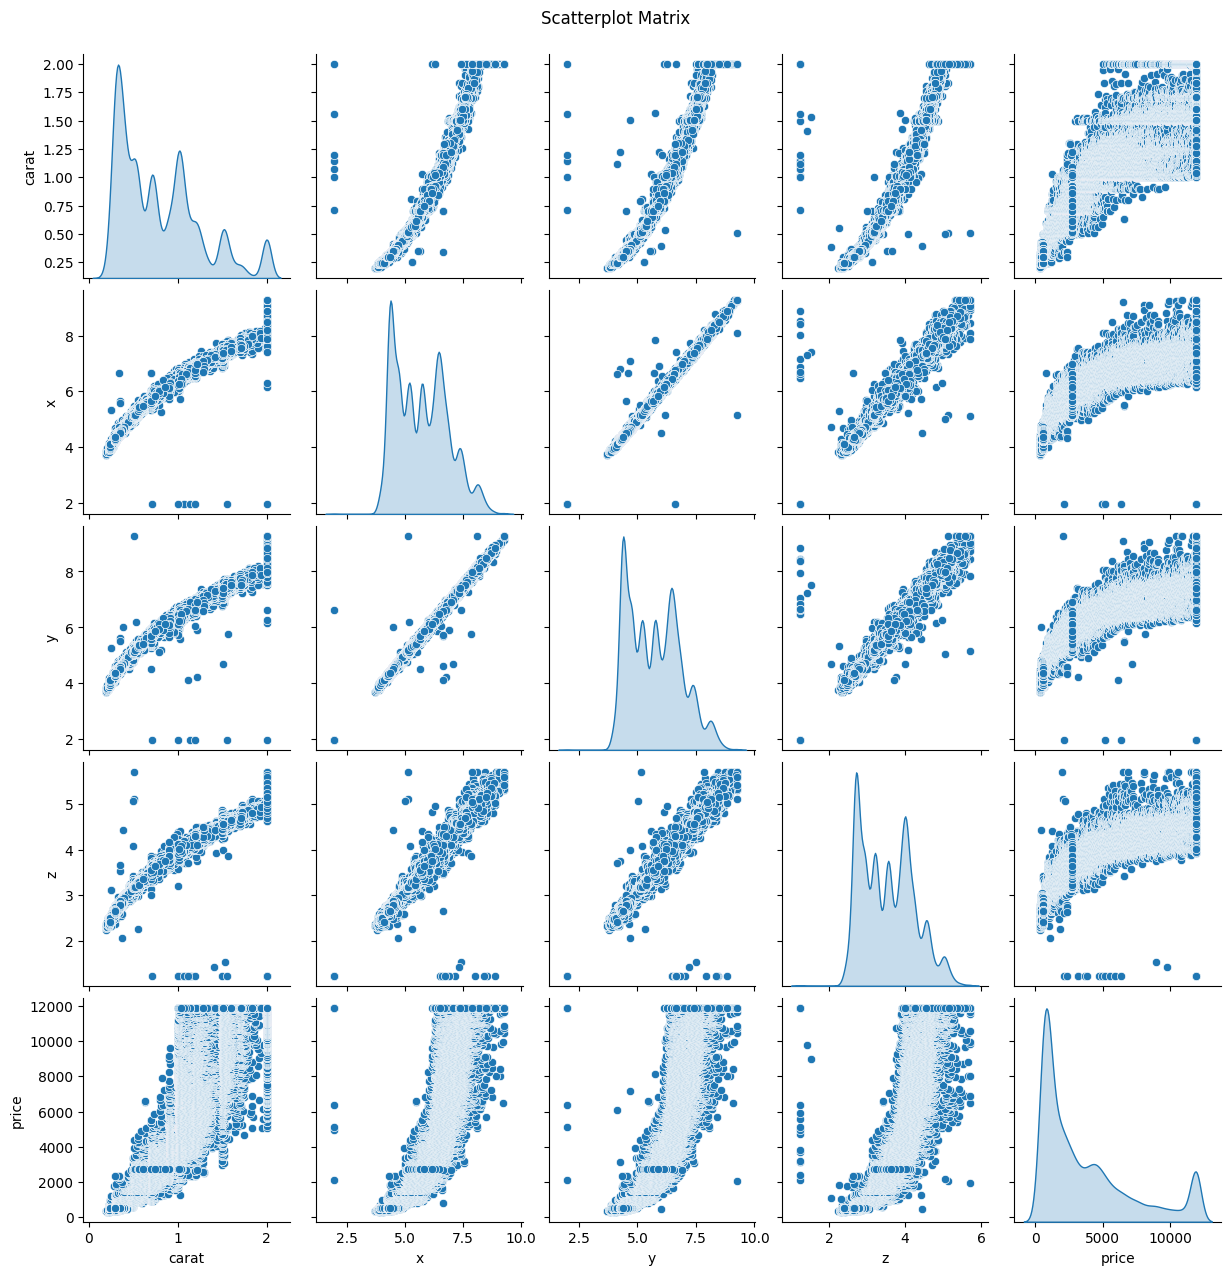

In [30]:
#Scatterplot matrix for carat, x, y, z, and price
sns.pairplot(df[["carat","x","y","z","price"]], diag_kind="kde")
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

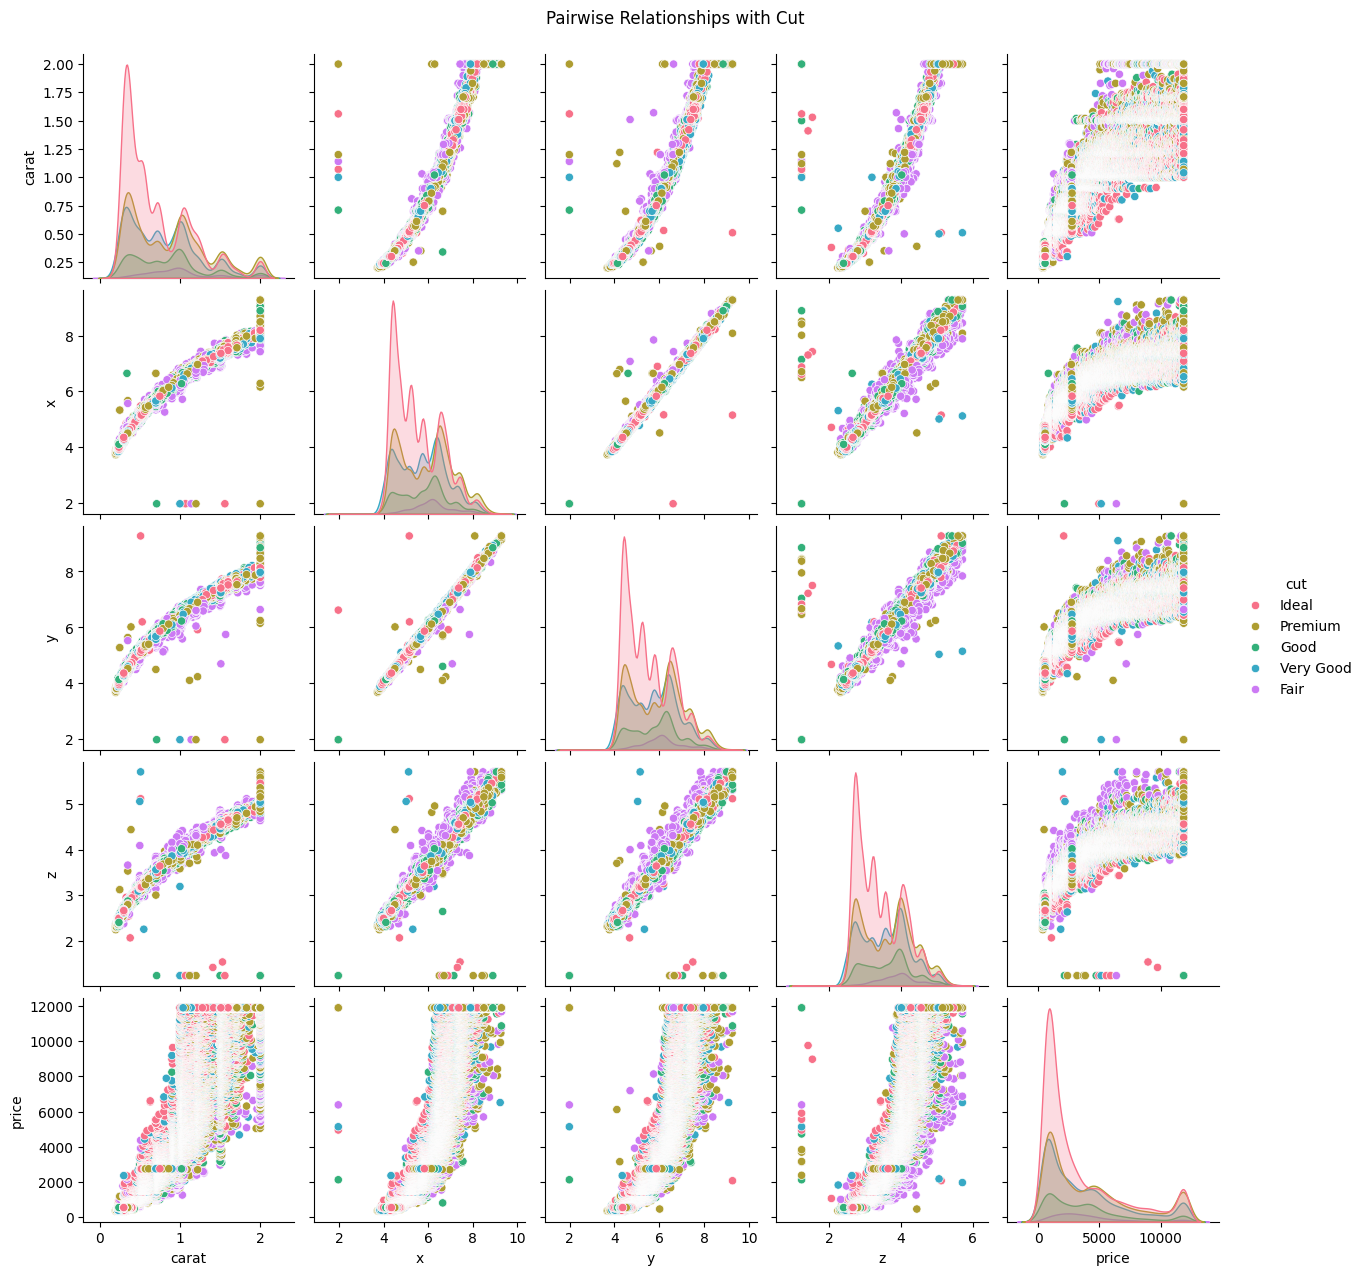

In [31]:
#Pairwise relationships using sns.pairplot()
sns.pairplot(df, vars=["carat","x","y","z","price"], hue="cut", palette="husl")
plt.suptitle("Pairwise Relationships with Cut", y=1.02)
plt.show()

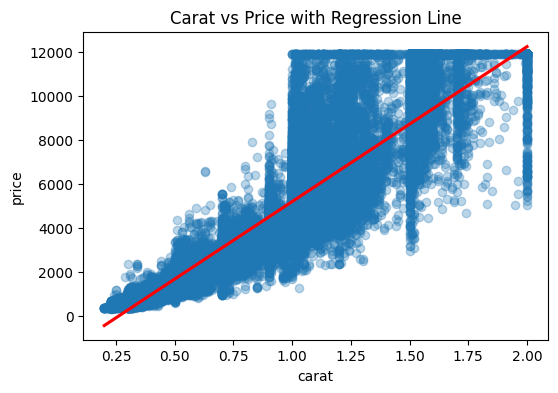

In [32]:
# Regression lineplot: Carat vs Price
plt.figure(figsize=(6,4))
sns.regplot(x="carat", y="price", data=df,
            scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Carat vs Price with Regression Line")
plt.show()

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1413449500.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="cut", y="price", data=df, estimator="mean", ci=None, palette="Set2")
C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1413449500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cut", y="price", data=df, estimator="mean", ci=None, palette="Set2")


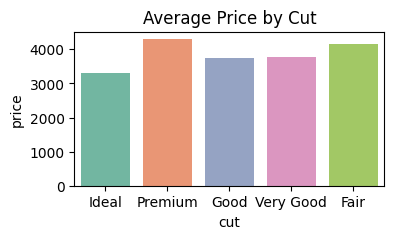

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1413449500.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="color", y="price", data=df, estimator="mean", ci=None, palette="Set2")
C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1413449500.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="color", y="price", data=df, estimator="mean", ci=None, palette="Set2")


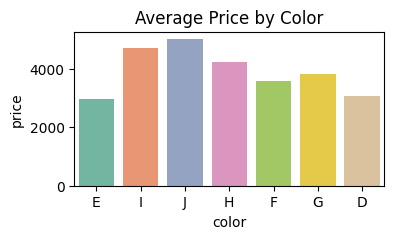

C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1413449500.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="clarity", y="price", data=df, estimator="mean", ci=None, palette="Set2")
C:\Users\Priya Andrew\AppData\Local\Temp\ipykernel_1912\1413449500.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="clarity", y="price", data=df, estimator="mean", ci=None, palette="Set2")


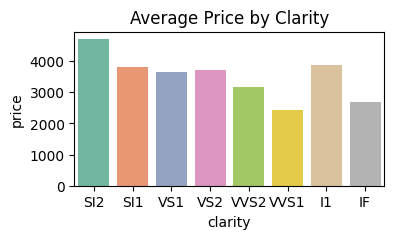

In [33]:
#Average Price per Cut, Color, Clarity (Bar Plots)
plt.figure(figsize=(4,2))
sns.barplot(x="cut", y="price", data=df, estimator="mean", ci=None, palette="Set2")
plt.title("Average Price by Cut")
plt.show()

# Average price per Color
plt.figure(figsize=(4,2))
sns.barplot(x="color", y="price", data=df, estimator="mean", ci=None, palette="Set2")
plt.title("Average Price by Color")
plt.show()

# Average price per Clarity
plt.figure(figsize=(4,2))
sns.barplot(x="clarity", y="price", data=df, estimator="mean", ci=None, palette="Set2")
plt.title("Average Price by Clarity")
plt.show()


In [34]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75


In [35]:
#Feature Engineering

df["Volume"] = df["x"] * df["y"] * df["z"]
print(df.head())

   carat      cut color clarity  price     x     y     z     Volume
0   0.23    Ideal     E     SI2  326.0  3.95  3.98  2.43  38.202030
1   0.21  Premium     E     SI1  326.0  3.89  3.84  2.31  34.505856
2   0.23     Good     E     VS1  327.0  4.05  4.07  2.31  38.076885
3   0.29  Premium     I     VS2  334.0  4.20  4.23  2.63  46.724580
4   0.31     Good     J     SI2  335.0  4.34  4.35  2.75  51.917250


In [36]:
df['Price per Carat'] = (df['price']/df['carat']).round(2)
df['Price per Carat']

0        1417.39
1        1552.38
2        1421.74
3        1151.72
4        1080.65
          ...   
53935    3829.17
53936    3829.17
53937    3938.57
53938    3205.81
53939    3676.00
Name: Price per Carat, Length: 53794, dtype: float64

In [37]:
#Dimension Ratio = (x + y) / (2 * z)
df['Dimension Ratio'] = ((df['x']+df['y'])/(2*df['x'])).round(2)
df['Dimension Ratio']

0        1.00
1        0.99
2        1.00
3        1.00
4        1.00
         ... 
53935    1.00
53936    1.01
53937    1.00
53938    1.00
53939    1.00
Name: Dimension Ratio, Length: 53794, dtype: float64

In [38]:
df

,carat,cut,color,clarity,price,x,y,z,Volume,Price per Carat,Dimension Ratio
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99
2,0.23,Good,E,VS1,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757.0,5.75,5.76,3.50,115.920000,3829.17,1.00
53936,0.72,Good,D,SI1,2757.0,5.69,5.75,3.61,118.110175,3829.17,1.01
53937,0.70,Very Good,D,SI1,2757.0,5.66,5.68,3.56,114.449728,3938.57,1.00
53938,0.86,Premium,H,SI2,2757.0,6.15,6.12,3.74,140.766120,3205.81,1.00


In [39]:
#new column for Carat_ Category
df["Carat_Category"] = np.where(df["carat"] < 0.5, "Light",
                             np.where(df["carat"] <= 1.5, "Medium", "Heavy"))
df['Carat_Category']

0         Light
1         Light
2         Light
3         Light
4         Light
          ...  
53935    Medium
53936    Medium
53937    Medium
53938    Medium
53939    Medium
Name: Carat_Category, Length: 53794, dtype: object

In [40]:
df['Carat_Category'].unique()

array(['Light', 'Medium', 'Heavy'], dtype=object)

In [41]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z', 'Volume',
       'Price per Carat', 'Dimension Ratio', 'Carat_Category'],
      dtype='object')

In [42]:
length = len(df.columns)
print(length)

12


In [43]:
df.head()

,carat,cut,color,clarity,price,x,y,z,Volume,Price per Carat,Dimension Ratio,Carat_Category
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,Light
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,Light
2,0.23,Good,E,VS1,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,Light
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,Light
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,Light


In [44]:
#encoding categorical columns
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
Carat_Category_order = ['Light', 'Medium', 'Heavy']

df['color_encoded'] = df['color'].astype(pd.CategoricalDtype(categories=color_order, ordered=True)).cat.codes
df['cut_encoded'] = df['cut'].astype(pd.CategoricalDtype(categories=cut_order, ordered=True)).cat.codes
df['clarity_encoded'] = df['clarity'].astype(pd.CategoricalDtype(categories=clarity_order, ordered=True)).cat.codes
df['Carat_Cat_encoded'] = df['Carat_Category'].astype(pd.CategoricalDtype(categories=Carat_Category_order, ordered=True)).cat.codes


In [45]:
df.head()

,carat,cut,color,clarity,price,x,y,z,Volume,Price per Carat,Dimension Ratio,Carat_Category,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,Light,5,4,1,0
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,Light,5,3,2,0
2,0.23,Good,E,VS1,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,Light,5,1,4,0
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,Light,1,3,3,0
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,Light,0,1,1,0


In [46]:
df.drop(['carat','cut','color','clarity','Carat_Category'],axis=1,inplace=True)
df.head()

,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
0,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,5,4,1,0
1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,5,3,2,0
2,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,5,1,4,0
3,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,1,3,3,0
4,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,0,1,1,0


In [47]:
df.columns

Index(['price', 'x', 'y', 'z', 'Volume', 'Price per Carat', 'Dimension Ratio',
       'color_encoded', 'cut_encoded', 'clarity_encoded', 'Carat_Cat_encoded'],
      dtype='object')

In [48]:
#splitting dataset
X = df.drop('price',axis=1)
y = df['price']

In [49]:
X

,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
0,3.95,3.98,2.43,38.202030,1417.39,1.00,5,4,1,0
1,3.89,3.84,2.31,34.505856,1552.38,0.99,5,3,2,0
2,4.05,4.07,2.31,38.076885,1421.74,1.00,5,1,4,0
3,4.20,4.23,2.63,46.724580,1151.72,1.00,1,3,3,0
4,4.34,4.35,2.75,51.917250,1080.65,1.00,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
53935,5.75,5.76,3.50,115.920000,3829.17,1.00,6,4,2,1
53936,5.69,5.75,3.61,118.110175,3829.17,1.01,6,1,2,1
53937,5.66,5.68,3.56,114.449728,3938.57,1.00,6,2,2,1
53938,6.15,6.12,3.74,140.766120,3205.81,1.00,2,3,1,1


In [50]:
y


0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53794, dtype: float64

In [51]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [53]:
X_train

,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
45307,4.28,4.31,2.65,48.884020,1746.67,1.00,6,4,2,0
15892,6.46,6.43,3.97,164.905066,6290.10,1.00,3,4,3,1
22182,6.31,6.36,3.95,158.519820,10119.80,1.00,6,3,5,1
48310,4.06,4.08,2.51,41.577648,2140.00,1.00,4,4,3,0
32731,4.34,4.29,2.69,50.084034,2587.10,0.99,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...
11311,6.51,6.46,3.92,164.854032,4984.00,1.00,2,3,3,1
44869,5.52,5.56,3.42,104.963904,2584.13,1.00,3,4,2,1
38271,4.39,4.42,2.72,52.778336,1200.00,1.00,0,4,2,0
860,6.13,6.03,3.82,141.202098,3190.00,0.99,0,3,2,1


In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

    # Save model as pickle file
    filename = f"{name}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"{name} saved as {filename}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

Linear Regression saved as Linear Regression_model.pkl
Decision Tree Regressor saved as Decision Tree Regressor_model.pkl
Random Forest Regressor saved as Random Forest Regressor_model.pkl
XGBoost Regressor saved as XGBoost Regressor_model.pkl


,MAE,MSE,RMSE,R2 Score
Linear Regression,306.559528,223487.111988,472.744235,0.980556
Decision Tree Regressor,46.143426,14630.668832,120.957302,0.998727
Random Forest Regressor,33.415295,7263.879840,85.228398,0.999368
XGBoost Regressor,45.178874,7617.754405,87.279748,0.999337


In [58]:
#model performance comparision
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MAE','R2 Score'])
results_df = results_df.sort_values(by='R2 Score', ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                                MAE  R2 Score
Random Forest Regressor   33.415295  0.999368
XGBoost Regressor         45.178874  0.999337
Decision Tree Regressor   46.143426  0.998727
Linear Regression        306.559528  0.980556


In [59]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [60]:
#ANN regression model using pytorch
# Convert to tensors

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)



# Dataset and loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

model_pt = ANNModel(X_train.shape[1])

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_pt.parameters(), lr=0.001)

# Train loop
epochs = 25
for epoch in range(epochs):
    model_pt.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model_pt(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model_pt.eval()
with torch.no_grad():
    y_pred_pt = model_pt(X_test_tensor)
    mse = criterion(y_pred_pt, y_test_tensor)
    print(f"Test MSE: {mse.item():.4f}")


Epoch [10/25], Loss: 124288.9141
Epoch [20/25], Loss: 61914.4570
Test MSE: 40726.9414


In [61]:
df.columns

Index(['price', 'x', 'y', 'z', 'Volume', 'Price per Carat', 'Dimension Ratio',
       'color_encoded', 'cut_encoded', 'clarity_encoded', 'Carat_Cat_encoded'],
      dtype='object')

In [62]:
df

,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
0,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,5,4,1,0
1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,5,3,2,0
2,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,5,1,4,0
3,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,1,3,3,0
4,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,2757.0,5.75,5.76,3.50,115.920000,3829.17,1.00,6,4,2,1
53936,2757.0,5.69,5.75,3.61,118.110175,3829.17,1.01,6,1,2,1
53937,2757.0,5.66,5.68,3.56,114.449728,3938.57,1.00,6,2,2,1
53938,2757.0,6.15,6.12,3.74,140.766120,3205.81,1.00,2,3,1,1


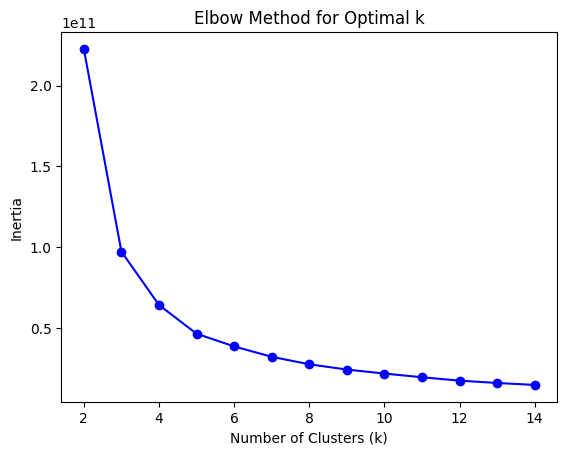

In [63]:
#Elbow Method (for KMeans optimal k) 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(2, 15)  # trying clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [64]:
#PCA for visualization (reduce to 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

print("Explained variance by 2 PCs:", pca.explained_variance_ratio_.sum())

Explained variance by 2 PCs: 0.999966464998838


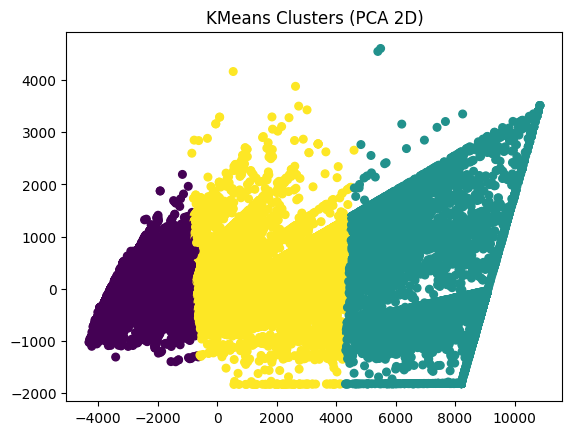

In [65]:
#Clustering method Kmeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # use elbow result
labels_kmeans = kmeans.fit_predict(df)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=30)
plt.title("KMeans Clusters (PCA 2D)")
plt.show()

In [66]:
#Cluster Evaluation
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(df, labels_kmeans))

KMeans Silhouette: 0.6120551172920554


In [67]:
#pickle Kmeans
import pickle
with open('C:/guvi_project/Diamond_Dynamics/Diamond_prediction/clustering_kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [68]:
#add cluster labels
df['Cluster'] = kmeans.labels_
df.head()

,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded,Cluster
0,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,5,4,1,0,0
1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,5,3,2,0,0
2,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,5,1,4,0,0
3,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,1,3,3,0,0
4,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,0,1,1,0,0


In [69]:
#groupby
df.groupby('Cluster').mean()

,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
Cluster,,,,,,,,,,,
0,1296.398073,4.912863,4.918699,3.034160,76.354248,2639.862911,1.000100,3.627504,2.997376,3.371965,0.415944
1,10484.602720,7.405041,7.400384,4.561223,255.092240,6998.536651,0.999804,2.937206,2.919333,3.070402,1.587489
2,4864.968718,6.430880,6.429283,3.974084,166.620279,4750.743995,0.999769,3.225467,2.713785,2.416667,1.034268


In [70]:
df.groupby('Cluster').mean().sort_values('price',ascending=False)


,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded
Cluster,,,,,,,,,,,
1,10484.602720,7.405041,7.400384,4.561223,255.092240,6998.536651,0.999804,2.937206,2.919333,3.070402,1.587489
2,4864.968718,6.430880,6.429283,3.974084,166.620279,4750.743995,0.999769,3.225467,2.713785,2.416667,1.034268
0,1296.398073,4.912863,4.918699,3.034160,76.354248,2639.862911,1.000100,3.627504,2.997376,3.371965,0.415944


In [71]:
# Define mapping dictionary
cluster_labels = {
    0: 'Very Small Diamonds',
    1: 'Mid-range Diamonds',
    2: 'Premium Heavy Diamonds'
    
}

# Map cluster labels
df['Segment'] = df['Cluster'].map(cluster_labels)

# View result

df.head()

,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded,Cluster,Segment
0,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,5,4,1,0,0,Very Small Diamonds
1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,5,3,2,0,0,Very Small Diamonds
2,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,5,1,4,0,0,Very Small Diamonds
3,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,1,3,3,0,0,Very Small Diamonds
4,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,0,1,1,0,0,Very Small Diamonds


In [72]:
df.columns

Index(['price', 'x', 'y', 'z', 'Volume', 'Price per Carat', 'Dimension Ratio',
       'color_encoded', 'cut_encoded', 'clarity_encoded', 'Carat_Cat_encoded',
       'Cluster', 'Segment'],
      dtype='object')

In [73]:
df['Segment'].value_counts()

Segment
Very Small Diamonds       30105
Premium Heavy Diamonds    15408
Mid-range Diamonds         8281
Name: count, dtype: int64

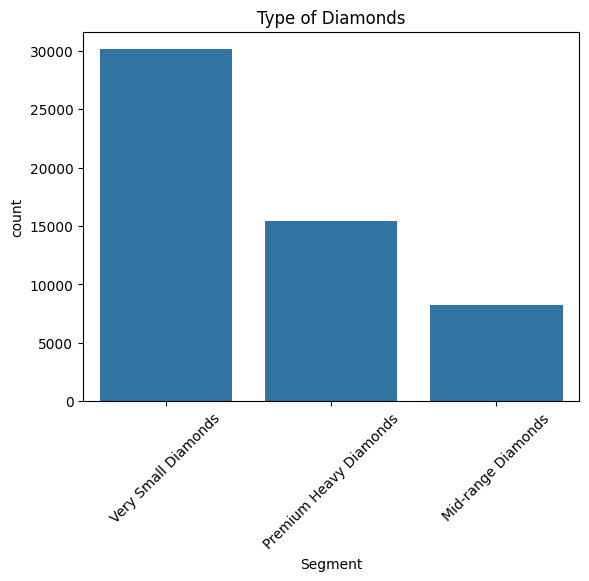

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Type of Diamonds")
plt.show()

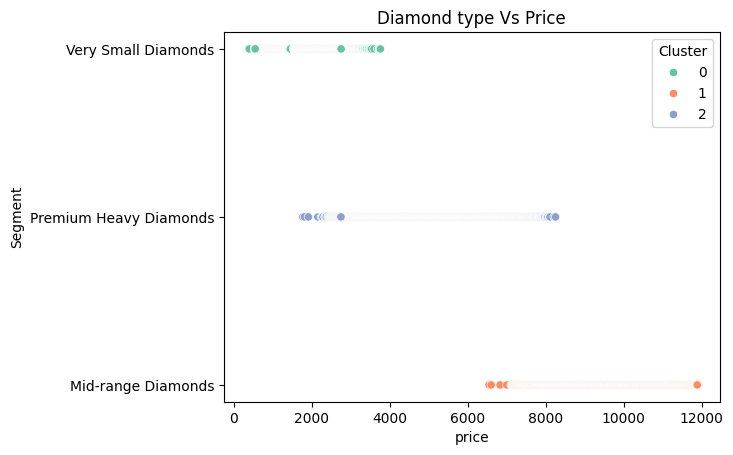

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='price', y='Segment', hue='Cluster', data=df, palette='Set2')
plt.title("Diamond type Vs Price")
plt.show()

In [76]:
df

,price,x,y,z,Volume,Price per Carat,Dimension Ratio,color_encoded,cut_encoded,clarity_encoded,Carat_Cat_encoded,Cluster,Segment
0,326.0,3.95,3.98,2.43,38.202030,1417.39,1.00,5,4,1,0,0,Very Small Diamonds
1,326.0,3.89,3.84,2.31,34.505856,1552.38,0.99,5,3,2,0,0,Very Small Diamonds
2,327.0,4.05,4.07,2.31,38.076885,1421.74,1.00,5,1,4,0,0,Very Small Diamonds
3,334.0,4.20,4.23,2.63,46.724580,1151.72,1.00,1,3,3,0,0,Very Small Diamonds
4,335.0,4.34,4.35,2.75,51.917250,1080.65,1.00,0,1,1,0,0,Very Small Diamonds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757.0,5.75,5.76,3.50,115.920000,3829.17,1.00,6,4,2,1,0,Very Small Diamonds
53936,2757.0,5.69,5.75,3.61,118.110175,3829.17,1.01,6,1,2,1,0,Very Small Diamonds
53937,2757.0,5.66,5.68,3.56,114.449728,3938.57,1.00,6,2,2,1,0,Very Small Diamonds
53938,2757.0,6.15,6.12,3.74,140.766120,3205.81,1.00,2,3,1,1,0,Very Small Diamonds


In [88]:
df["Price per Carat"]

0        1417.39
1        1552.38
2        1421.74
3        1151.72
4        1080.65
          ...   
53935    3829.17
53936    3829.17
53937    3938.57
53938    3205.81
53939    3676.00
Name: Price per Carat, Length: 53794, dtype: float64

In [86]:
#saved the converted file

# Save to CSV
df.to_csv("clustered_data.csv", index=False)

print("Saved clustered file as clustered_data.csv")

Saved clustered file as clustered_data.csv


In [87]:
df['Carat_Cat_encoded'].unique()

array([0, 1, 2], dtype=int8)

In [78]:
df['clarity_encoded'].unique()

array([1, 2, 4, 3, 5, 6, 0, 7], dtype=int8)

In [79]:
df['cut_encoded'].unique()

array([4, 3, 1, 2, 0], dtype=int8)

In [81]:
df['color_encoded'].unique()

array([5, 1, 0, 2, 4, 3, 6], dtype=int8)

In [82]:
df['Volume'].max()

np.float64(491.4708345000001)

In [83]:
import pickle
with open('Random Forest Regressor_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [84]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
model.predict([X_train.iloc[860].to_list()])

c:\Users\Priya Andrew\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1338.15])